🚢 Titanic Dataset – Exploratory Data Analysis (EDA)

Performing EDA on the Kaggle Titanic dataset. It includes exploring missing values, distributions, and relationships between features and survival.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [2]:
#Load Dataset
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Data Overview
df.shape, df.info(), df.describe(include='all'), df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


((891, 12),
 None,
         PassengerId    Survived      Pclass                 Name   Sex  \
 count    891.000000  891.000000  891.000000                  891   891   
 unique          NaN         NaN         NaN                  891     2   
 top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
 freq            NaN         NaN         NaN                    1   577   
 mean     446.000000    0.383838    2.308642                  NaN   NaN   
 std      257.353842    0.486592    0.836071                  NaN   NaN   
 min        1.000000    0.000000    1.000000                  NaN   NaN   
 25%      223.500000    0.000000    2.000000                  NaN   NaN   
 50%      446.000000    0.000000    3.000000                  NaN   NaN   
 75%      668.500000    1.000000    3.000000                  NaN   NaN   
 max      891.000000    1.000000    3.000000                  NaN   NaN   
 
                Age       SibSp       Parch  Ticket        Fare Cabin Embarked 

In [4]:
#Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

/tmp/ipython-input-4284880336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4284880336.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


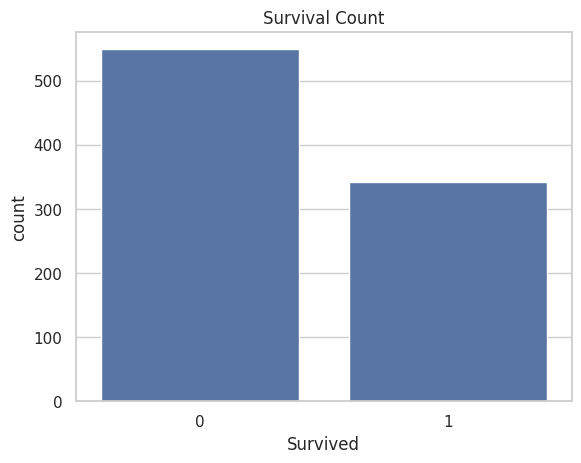

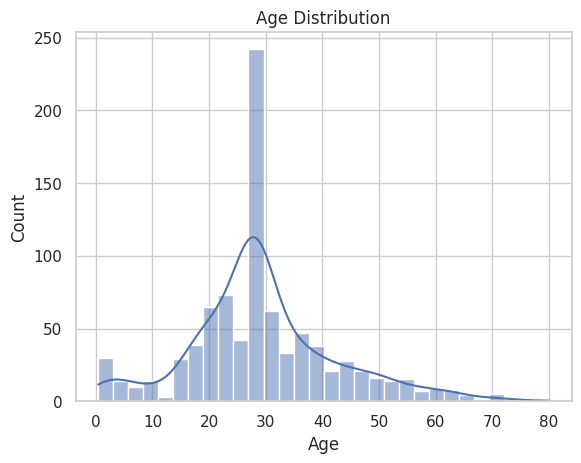

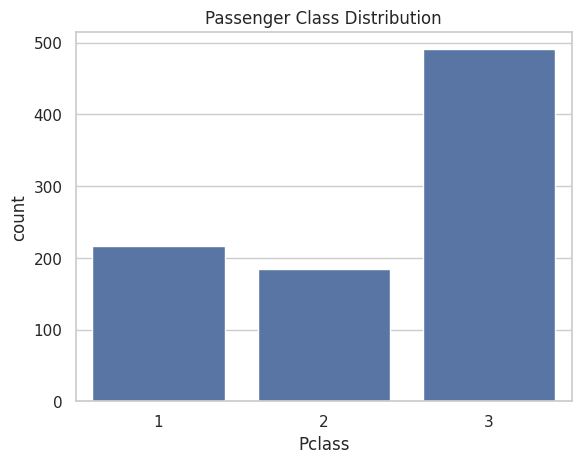

In [5]:
#Univariate Analysis
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

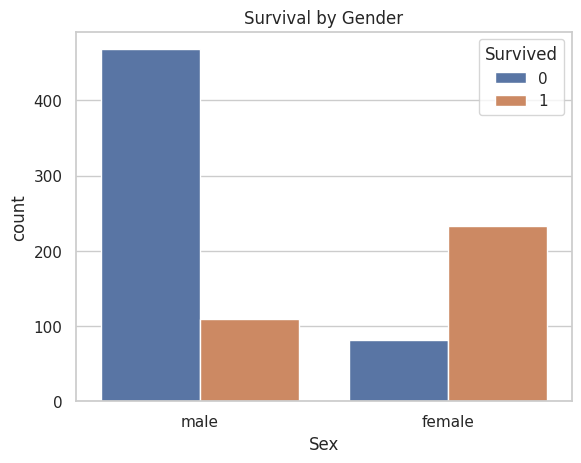

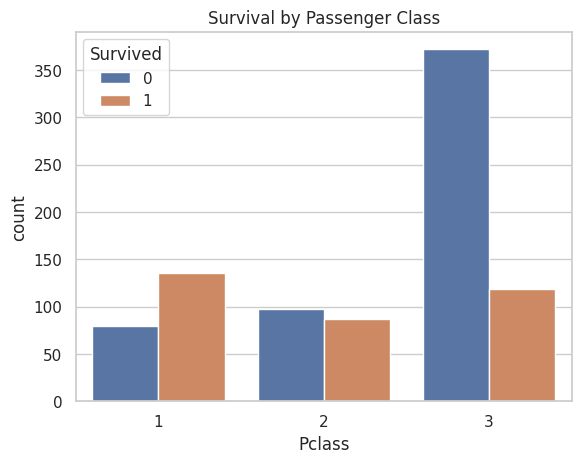

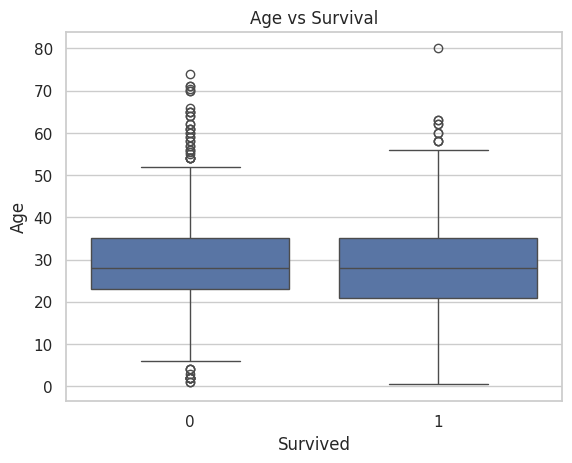

In [6]:
#Bivariate Analysis
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

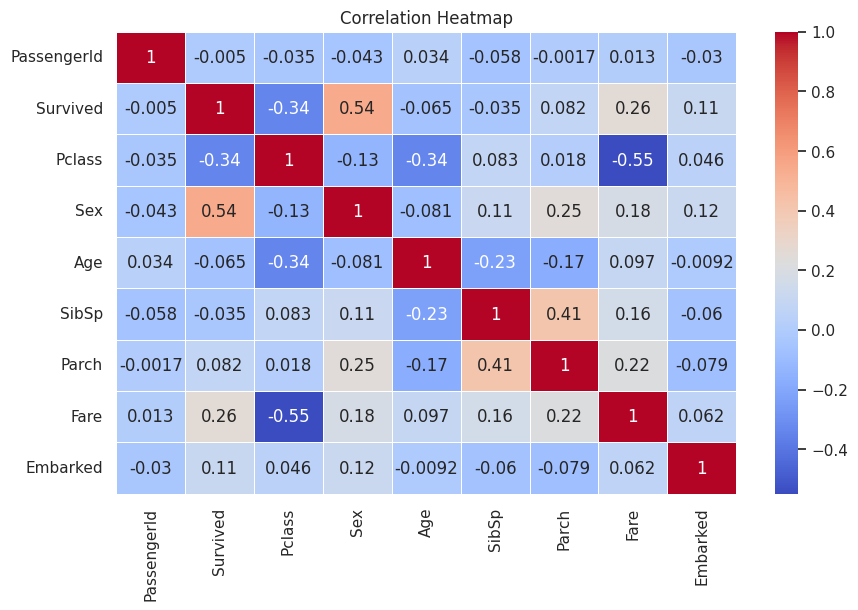

In [7]:
#Correlation Heatmap
# Copy dataframe
df_corr = df.copy()

# Convert categorical variables to numeric
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Drop non-numeric columns (Name, Ticket are just strings)
df_corr = df_corr.drop(columns=['Name','Ticket'])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Key Insights
- Females had higher survival chances than males.
- First-class passengers survived more often than 2nd/3rd class.
- Younger passengers had slightly higher survival rates.
- Higher fares correlate with survival probability.